In [10]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [11]:
torch.manual_seed(12)

C:\Users\ping\AppData\Local\Temp\ipykernel_25584\2294562342.py:9: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  test_x, test_y = Variable(test_x, volatile=True), Variable(test_y, volatile=True)


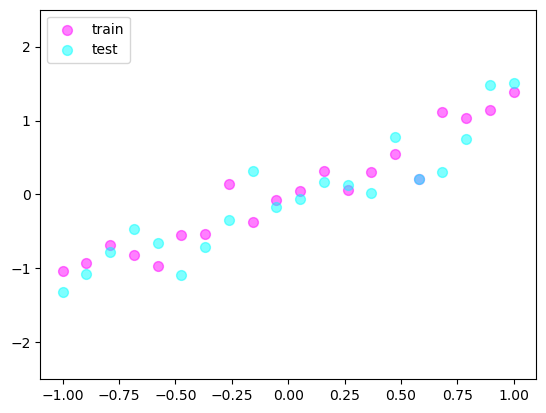

In [12]:
N_SAMPLES = 20

x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
y = x + 0.3*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES,1))
x, y = Variable(x), Variable(y)

test_x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
test_y = test_x + 0.3*torch.normal(torch.zeros(N_SAMPLES,1),torch.ones(N_SAMPLES,1))
test_x, test_y = Variable(test_x, volatile=True), Variable(test_y, volatile=True)

plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()

In [13]:
# Define model
N_HIDDEN =  300
net_overFit = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)

In [14]:
net_dropped = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)

optimizer_overFit = torch.optim.Adam(net_overFit.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(net_dropped.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

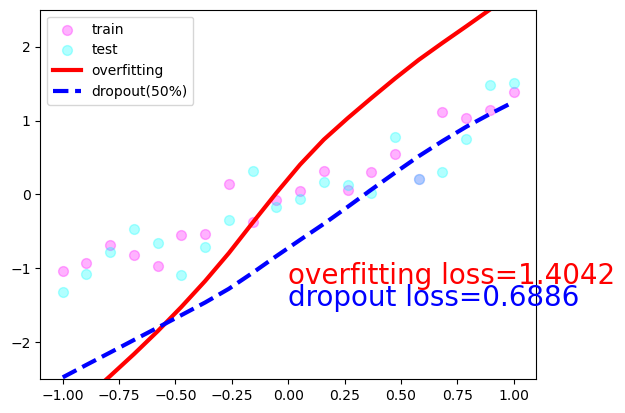

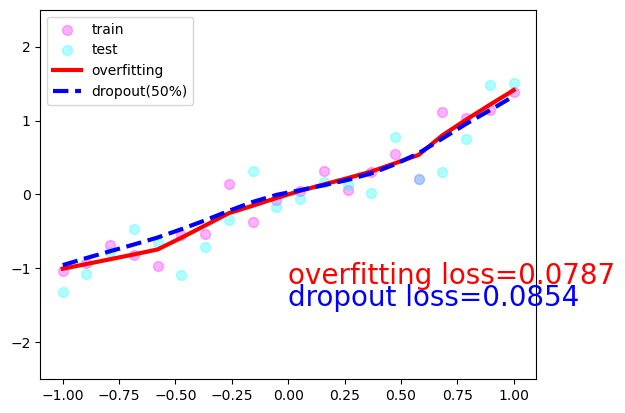

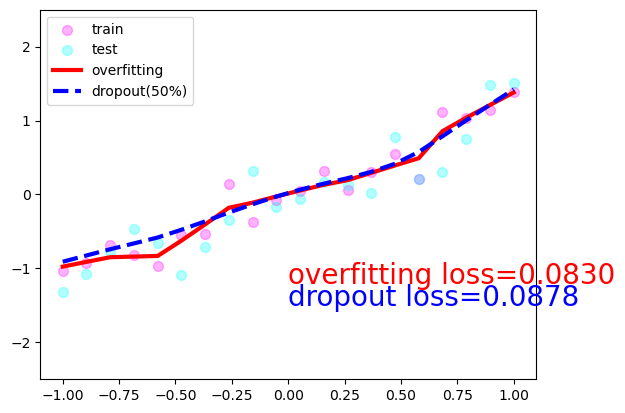

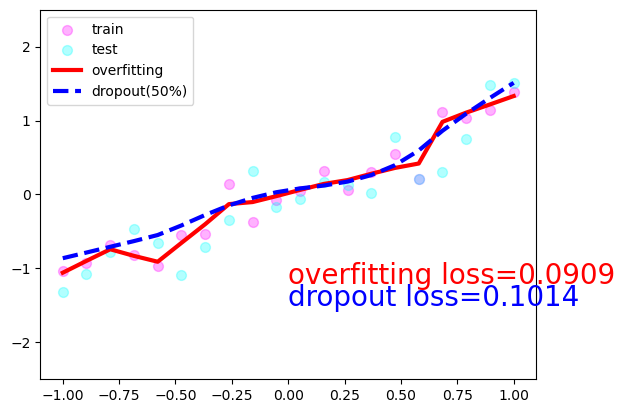

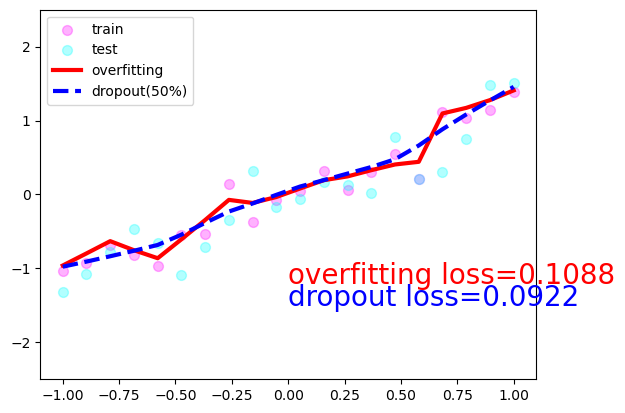

In [15]:
# Train
for t in range(500):

    pred_overFit = net_overFit(x)
    pred_drop = net_dropped(x)

    loss_overFit = loss_func(pred_overFit, y)
    loss_drop = loss_func(pred_drop, y)

    optimizer_overFit.zero_grad()
    optimizer_drop.zero_grad()

    loss_overFit.backward()
    loss_drop.backward()

    optimizer_overFit.step()
    optimizer_drop.step()

    if t % 100 == 0:
        net_overFit.eval()
        net_dropped.eval()

        # plotting
        plt.cla()
        test_pred_ofit = net_overFit(test_x)
        test_pred_drop = net_dropped(test_x)
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.3, label='test')
        plt.plot(test_x.data.numpy(), test_pred_ofit.data.numpy(), 'r-', lw=3, label='overfitting')
        plt.plot(test_x.data.numpy(), test_pred_drop.data.numpy(), 'b--', lw=3, label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % loss_func(test_pred_ofit, test_y).data, fontdict={'size': 20, 'color':  'red'})
        plt.text(0, -1.5, 'dropout loss=%.4f' % loss_func(test_pred_drop, test_y).data, fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left'); plt.ylim((-2.5, 2.5));plt.pause(0.1)

        # change back to train mode
        net_overFit.train()
        net_dropped.train()
        plt.show()